# Import Libraries

In [1]:
import tensorflow as tf
import time 
import requests
import cv2
import operator
import numpy as np
from PIL import Image, ImageOps
from io import BytesIO


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline 


# Image preprocessing

In [4]:
image_file ="Numero.png"
image_string=tf.io.read_file(image_file)
image=tf.image.decode_png(image_string,channels=3)

### Function to visualize changes

In [3]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

### Gamma

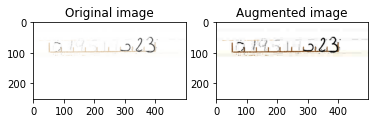

In [84]:
#gamma = tf.image.adjust_gamma(image, gamma=5, gain=1)
#visualize(image, gamma)

### Contrast

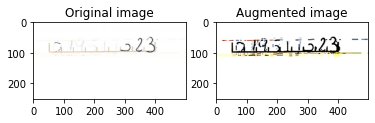

In [98]:
contrasted = tf.image.adjust_contrast(image,40)
visualize(image, contrasted)

### Inverted

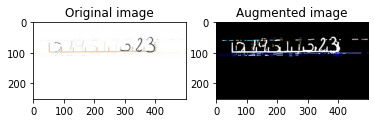

In [99]:
bitwise = tf.bitwise.invert(contrasted)
visualize(image, bitwise)

### Canny Edge detection

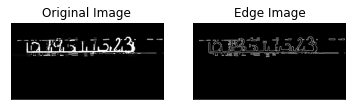

True

In [139]:
img = cv2.imread('converted.png',0)

edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite('messigray.png',img)

### Overlay converted + Canny

True

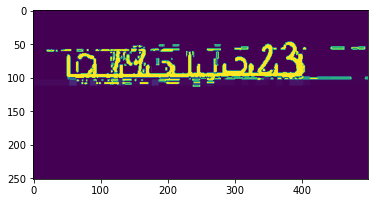

In [148]:
added = cv2.addWeighted(img, 1, edges, 1, 0)
imshow(added)
cv2.imwrite('overlay.png',img)

In [133]:
array = tf.keras.preprocessing.image.img_to_array(bitwise)
# save the image with a new filename
tf.keras.preprocessing.image.save_img('converted.png', array)

### Using Azure OCR to detect digits

In [2]:
# Variables

endpoint = 'XXXXXXXXXXXX' 
subscription_key = 'XXXXXXXXXXXXXXx'  


In [101]:

vision_analyze_url = endpoint + "vision/v3.0/ocr"

image_path =r'converted.jpg'


image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key, 
              "Content-Type": "application/octet-stream" }
params     = {'visualFeatures': 'Categories,Description,Color'}
response   = requests.post(vision_analyze_url, 
                           headers=headers, 
                           params=params, 
                           data=image_data)

response.raise_for_status()
analysis      = response.json()
print (analysis)

{'language': 'en', 'textAngle': 0.0, 'orientation': 'Up', 'regions': [{'boundingBox': '300,48,107,55', 'lines': [{'boundingBox': '300,48,107,55', 'words': [{'boundingBox': '300,48,107,55', 'text': '5,213'}]}]}]}


In [149]:

vision_analyze_url = endpoint + "vision/v3.0/ocr"

image_path =r'overlay.png'


image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key, 
              "Content-Type": "application/octet-stream" }
params     = {'visualFeatures': 'Categories,Description,Color'}
response   = requests.post(vision_analyze_url, 
                           headers=headers, 
                           params=params, 
                           data=image_data)

response.raise_for_status()
analysis      = response.json()
print (analysis)

{'language': 'ar', 'textAngle': 0.0, 'orientation': 'Right', 'regions': [{'boundingBox': '57,344,53,55', 'lines': [{'boundingBox': '57,344,53,55', 'words': [{'boundingBox': '57,344,53,55', 'text': 'ذات'}]}]}]}
